# kNN Wine Classification

## Imports

In [20]:
import pandas as pd
import numpy as np


import sklearn.datasets
import sklearn.model_selection

import sklearn.metrics as skm
import sklearn.neighbors as sn

import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [21]:
dataset = sklearn.datasets.load_wine(as_frame=True)

target_num2name = {ix: str(name) for ix, name in enumerate(dataset['target_names'])}
feature_names = dataset['feature_names']
dataset_df = dataset['frame']
dataset_df['named_target'] = dataset_df['target'].map(target_num2name)
dataset_df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,named_target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0


### Visualization for a 2D-feature space

In [22]:
from sklearn.inspection import DecisionBoundaryDisplay

In [23]:
feature2fit = [feature_names[ix] for ix in [12, 6]]
feature2fit

['proline', 'flavanoids']

Test Accuracy: 74.2%


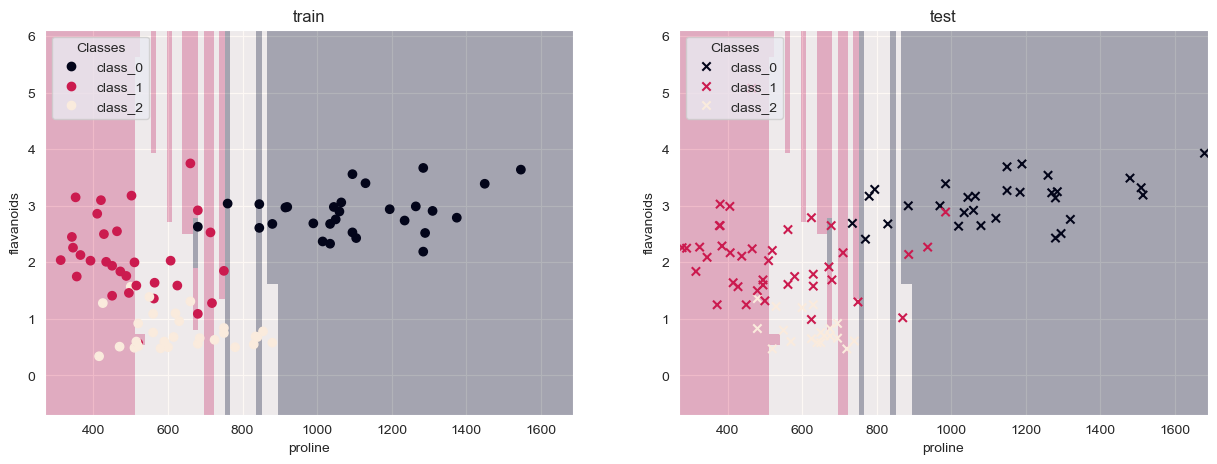

In [24]:
k = 1

train, test = sklearn.model_selection.train_test_split(dataset_df, test_size=0.5)

model = sn.KNeighborsClassifier(n_neighbors=k)
model.fit(X = train[feature2fit], y=train['named_target'])

test_pred = model.predict(test[feature2fit])
acc = skm.accuracy_score(test['named_target'], test_pred)


print(f'Test Accuracy: {100*acc:.1f}%')

fig, axes = plt.subplots(1, 2, figsize=(15,5))
splits = [('train', train, 'o'), ('test', test, 'x')]
for i in range(2):

    split_name, split, marker = splits[i]
    ax = axes[i]
    
    disp = DecisionBoundaryDisplay.from_estimator(
        model,
        dataset_df[feature2fit],
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
        alpha=0.3,
        ax = ax
    )
    
    scatter = ax.scatter(split[feature2fit[0]], split[feature2fit[1]], c=split['target'], marker=marker)
    _ = ax.legend(
        scatter.legend_elements()[0],
        target_num2name.values(),
        loc="upper left",
        title="Classes",
    )
    _ = ax.set_title(split_name)

### Z-Scoring

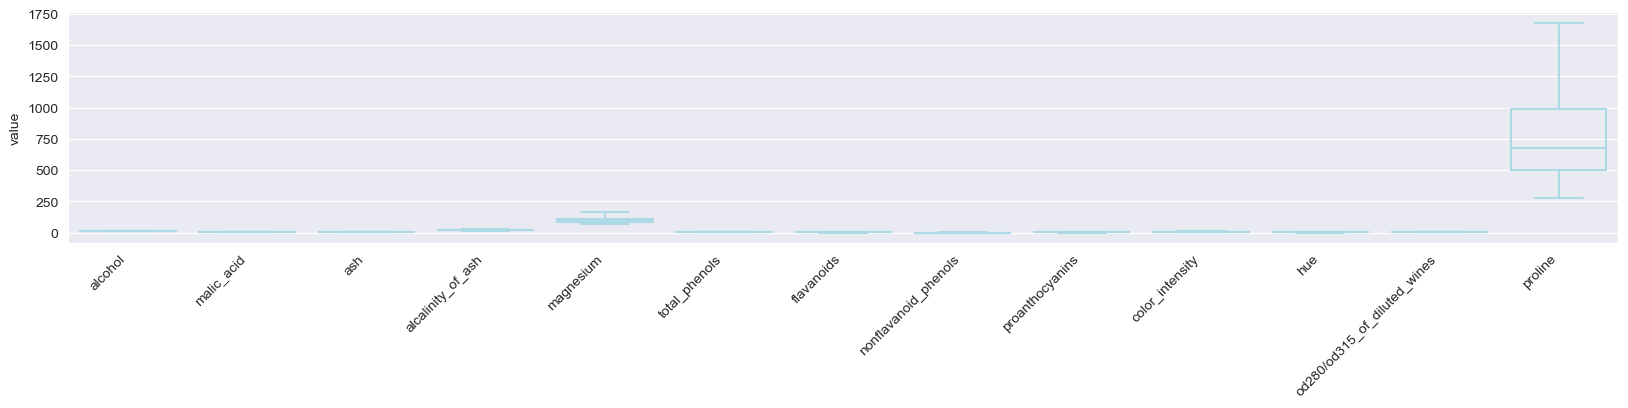

In [25]:
fig = plt.figure(figsize=(20,3))
sns.boxplot(dataset_df.iloc[:, :-2], fill=False, whis=(0,100), color='lightblue')
_ = plt.xticks(rotation=45, ha='right') 
_ = plt.ylabel('value')

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X=dataset_df.iloc[:, :-2])

StandardScaler()

In [27]:
scaled_df = scaler.transform(X=dataset_df.iloc[:, :-2])

/var/folders/zj/xhhchyk15_1fbj_njvk1j7dw0000gn/T/ipykernel_19436/3563137066.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(dataset_df.iloc[:, :-2].columns, rotation=45, ha='right')


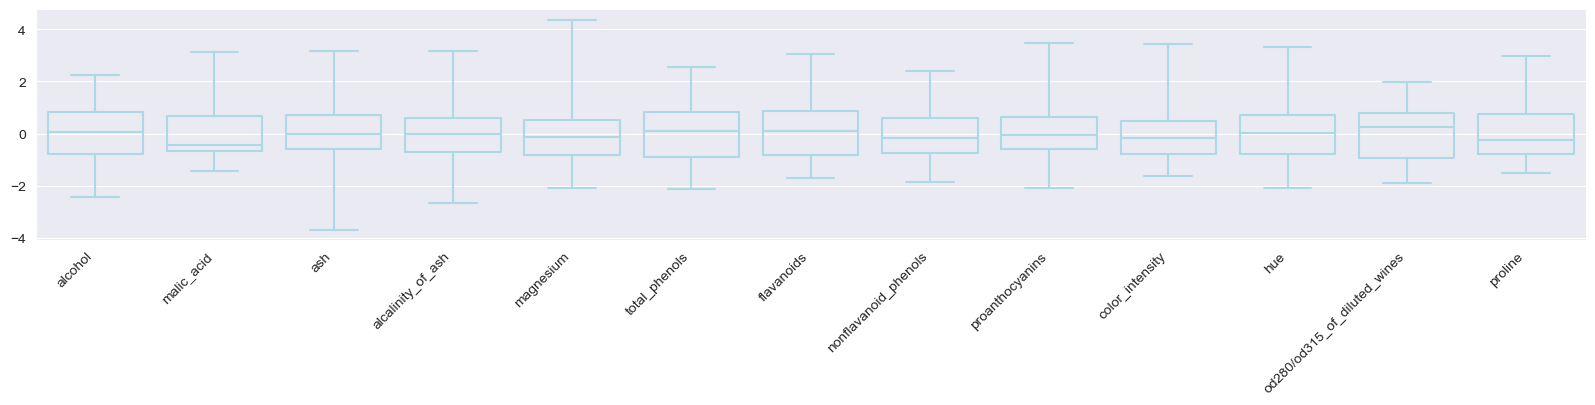

In [28]:
fig = plt.figure(figsize=(20,3))
ax = sns.boxplot(scaled_df, fill=False, whis=(0,100), color='lightblue')
_ = ax.set_xticklabels(dataset_df.iloc[:, :-2].columns, rotation=45, ha='right')

Accuracy: 85.4%


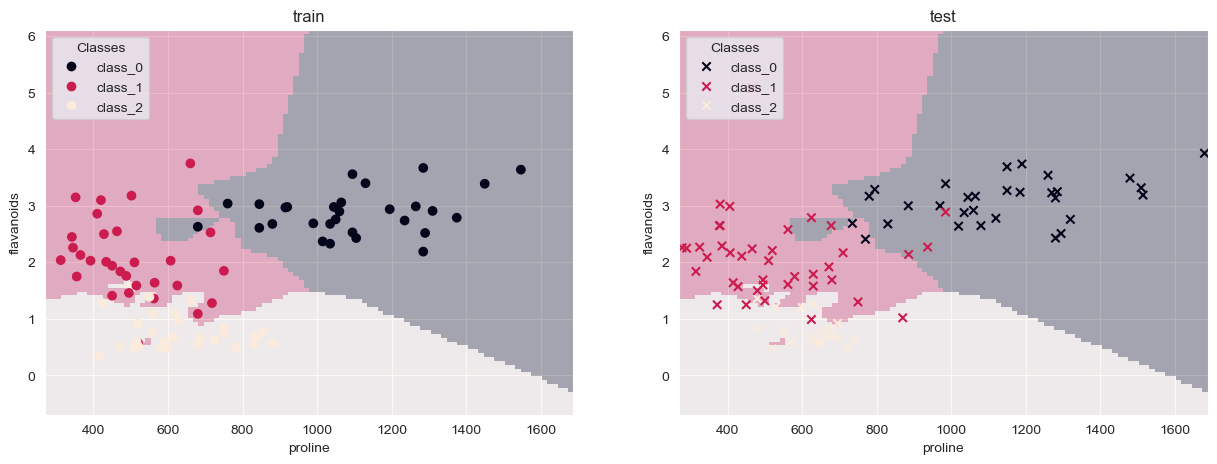

In [29]:
from sklearn.pipeline import Pipeline

k = 1

model = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', sn.KNeighborsClassifier(n_neighbors=k))
])
model.fit(X = train[feature2fit], y=train['named_target'])

test_pred = model.predict(test[feature2fit])
acc = skm.accuracy_score(test['named_target'], test_pred)


print(f'Accuracy: {100*acc:.1f}%')

fig, axes = plt.subplots(1, 2, figsize=(15,5))
splits = [('train', train, 'o'), ('test', test, 'x')]
for i in range(2):

    split_name, split, marker = splits[i]
    ax = axes[i]
    
    disp = DecisionBoundaryDisplay.from_estimator(
        model,
        dataset_df[feature2fit],
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
        alpha=0.3,
        ax = ax
    )
    
    scatter = ax.scatter(split[feature2fit[0]], split[feature2fit[1]], c=split['target'], marker=marker)
    _ = ax.legend(
        scatter.legend_elements()[0],
        target_num2name.values(),
        loc="upper left",
        title="Classes",
    )
    _ = ax.set_title(split_name)